# Gradient descent

## Simulate

$$X \sim U(0,1)$$

$$y = 2 + 9X + \epsilon$$
$$\epsilon \sin N(0,1)$$

(1000, 1) (1000, 1)


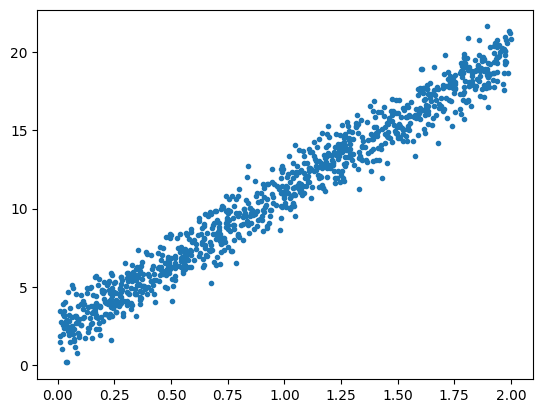

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) #add a seed, only works for this cell though. VERY IMPORTANT.

samples = 1000


X = 2*np.random.rand(samples, 1) # Creates a normal distribution with 1000 points. 

epsilon = np.random.normal(0,1, size=(samples, 1)) # noise. 
print(epsilon.shape, X.shape) #checking shape

y = 2+9*X+epsilon # We put it all together

plt.plot(X,y, ".")

In [58]:
X = np.c_[np.ones(samples), X] # concatination
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [59]:
from sklearn.model_selection import train_test_split

#Order is very important here.
# used help(train_test_split) to get the correct order here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # both X and Y should add up to 1000.

(670, 2) (330, 2) (670, 1) (330, 1)


## Batch gradient descent

In [60]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)  # length of X
    theta = np.random.randn(X.shape[1], 1)  # [beta_0, beta_1]^T in a vector

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y) # Calculating everything except \eta. \eta is learning rate.
        theta -= learning_rate*gradient #learning_rate is eta in theory.

    return theta

theta = gradient_descent(X_train, y_train)
print(theta) # We would like to see that theta converges at 9
theta.reshape(-1) # throws away additional dimension.


[[2.30053512]
 [8.82081873]]


array([2.30053512, 8.82081873])

In [61]:
steps = range(1, 200, 1)  # Range object. 1 to 200 with 1 step in between
thetas = np.array(
    [gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps]
)  # generating thetas with list comprehension
print(thetas.shape)


(199, 2)


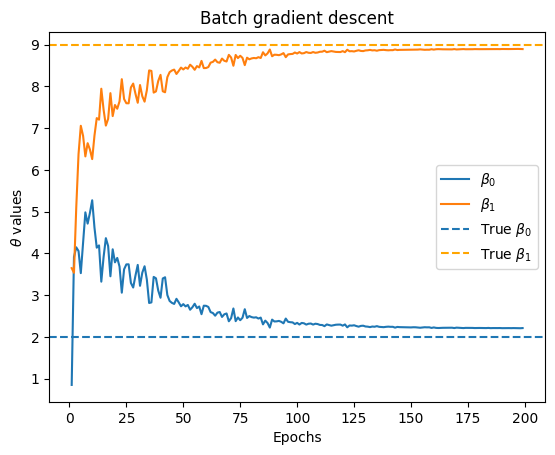

In [62]:
# plotting

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y = 2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title = "Batch gradient descent")
ax.legend(); # Seems to converge. 200 epochs. from steps range variable.

## Stocastic gradient descent (SGD)
- Geron(2019), book

In [63]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters
# The longer it goes the learning rate decays.

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m): # Goes through all samples
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i) # check Kokchuns code later.
        theta -= eta*gradient # there is a chance that we get the same value twice. but that is by design.

theta


array([[2.22376275],
       [8.91209806]])

In [64]:
y_pred = X_test@theta
MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

print(MAE, MSE, RMSE) # What do these mean?

0.7684804286407683 0.9516880917310647 0.9755450229133787
